In [1]:
%pylab inline

import warnings
import bz2
import pickle
warnings.filterwarnings('ignore')

from osim.env.osimMod36d import L2RunEnvMod 
import matplotlib.pyplot as plt
from stable_baselines import PPO2

from osim.env.utils import analysis as ana
from osim.env.utils.analysis import interpolate_gait_data 

Populating the interactive namespace from numpy and matplotlib


ModuleNotFoundError: No module named 'stable_baselines'

### Import env and model

In [74]:
log_dir = 'log/'

params_path = log_dir+'params.pbz2'
data = bz2.BZ2File(params_path, 'rb')
params = pickle.load(data)

try:
    env_v
except:
    # forward_reward, upward_reward, joint_penalty, stability_reward, ACT2, footstep_reward, jerk, slide
    reward_weight = params['reward_weight']
    action_limit = params['action_limit']
    L2RunEnvMod.time_limit = 100000
    env_v = L2RunEnvMod(visualize=True, reward_weight=reward_weight, target_speed_range=[1.0,1.0],
                        action_limit=action_limit, integrator_accuracy=params['integrator_accuracy'])
    env_v.osim_model.stepsize = params['stepsize']

model_v = PPO2.load(log_dir+'latest_model')

### Extract and save trajectory

In [75]:
analysis = ana.gaitAnalysis()
data = analysis.collect_traj_data(model_v, env_v, max_step = 1000, episode_length=1000, deterministic=False)
# analysis.save_traj_data(log_dir+'traj_data')
del env_v
del model_v

  0%|          | 0/1000 [00:00<?, ?it/s]

### Misc Test

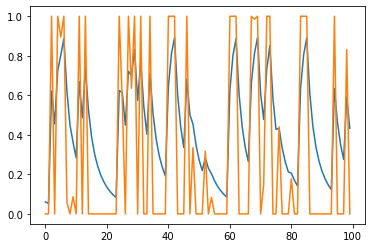

In [37]:
plot(analysis.extract_state(['muscles','hamstrings_r','activation'])[0:100])
plot(analysis.extract_state(['muscles','hamstrings_r','excitation'])[0:100])

In [ ]:
env_v.osim_model.state.getQDotDot().toString()

### Load trajectory data

In [4]:
analysis = ana.gaitAnalysis()
analysis.load_traj_data(log_dir+'traj_data')

### Generate joint angle plots

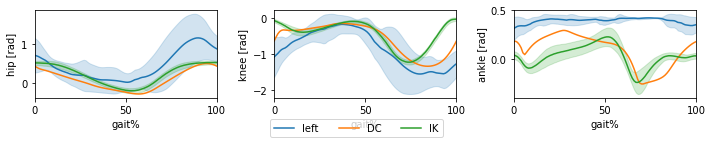

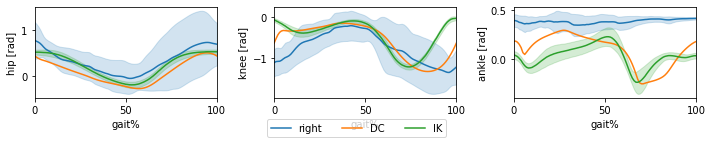

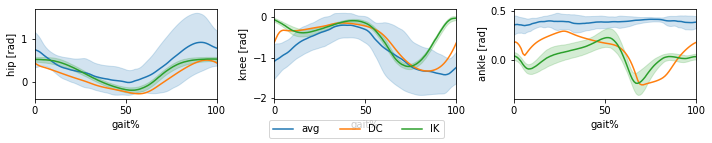

In [4]:
exp_data1 = analysis.load_exp_joint_data('osim/data/Moco Traj/gaitPrediction_solution_fullStride.csv', mode='Moco')
exp_data2 = analysis.load_exp_joint_data('osim/data/extracted from paper/walk_joint_kin_IK.csv', mode='extracted')
exp_data = [exp_data1[i]+exp_data2[i] for i in range(3)]
exp_legends = ['DC', 'IK']

analysis.plot_joint_angles(exp_data=exp_data, exp_legends=exp_legends, side='left', size=[10,2]);
analysis.plot_joint_angles(exp_data=exp_data, exp_legends=exp_legends, side='right', size=[10,2]);
analysis.plot_joint_angles(exp_data=exp_data, exp_legends=exp_legends, side='avg', size=[10,2]);

### Generate muscle activation plots

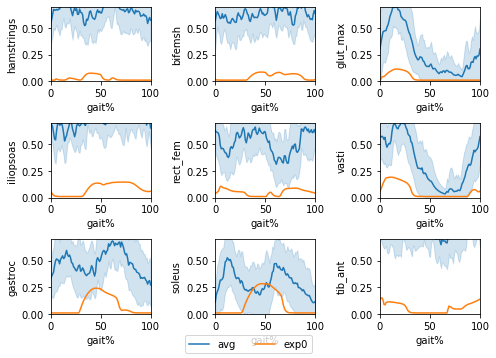

In [94]:
a = analysis.load_exp_activation_data('osim/data/Moco Traj/gaitPrediction_solution_fullStride.csv', mode='Moco')
b = analysis.load_exp_activation_data('osim/data/Osim Traj/walk_subject_mot.csv', mode='Osim')
c = analysis.load_exp_activation_data('osim/data/extracted from paper/muscle_act_bilevel_opt.csv', mode='extracted')
d = analysis.load_exp_activation_data('osim/data/extracted from paper/muscle_act_EMG.csv', mode='extracted')

analysis.plot_muscle_activation(exp_data=a, size=[7,5], arrange=[3,3]);

### Generate total muscle activation plot

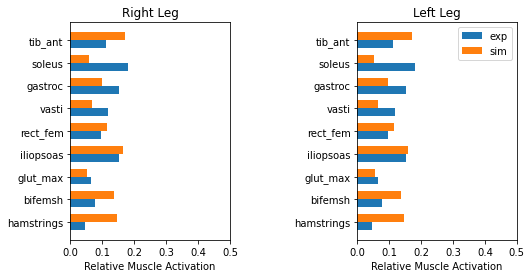

In [95]:
analysis.plot_total_muscle_activation(a)

### Generate Reward Correlation Plots

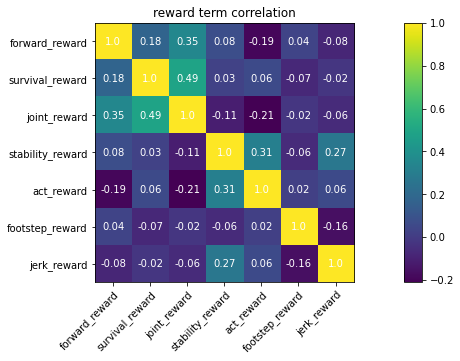

In [96]:
analysis.plot_reward_corr(weights=[1,1,0,1,1,1,1,1,0], size=[5,4]);

### Generate control excitation raster plot

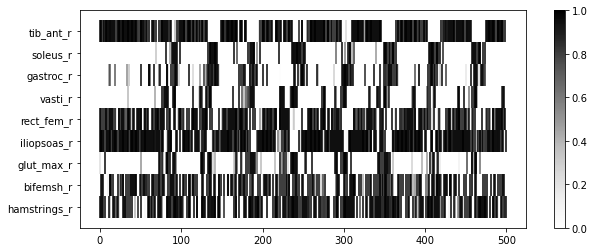

In [20]:
fig = analysis.plot_excitation_raster(steps=500, figsize=[10,4], side='right');

### Generate muscle activation raster plot

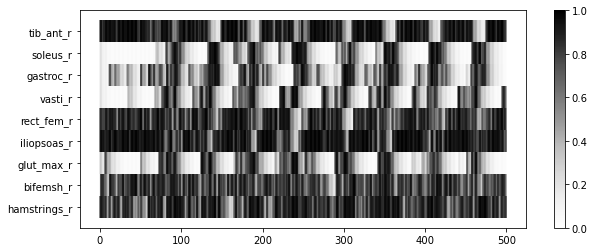

In [21]:
fig = analysis.plot_activation_raster(steps=500, figsize=[10,4], side='right');

### Calculate gait spatiotemporal parameters

In [23]:
analysis.cal_stride_params();


speed
mean: 0.73 with SD: 0.27

step time
mean: 0.51 with SD: 0.22

stride time
left mean: 1.02 with SD: 0.34
right mean: 1.00 with SD: 0.18
avg mean: 1.01 with SD: 0.27

stance%
left mean: 0.64 with SD: 0.07
right mean: 0.61 with SD: 0.13
avg mean: 0.62 with SD: 0.10

swing%
left mean: 0.36 with SD: 0.07
right mean: 0.39 with SD: 0.13
avg mean: 0.38 with SD: 0.10

stance_time
left mean: 0.66 with SD: 0.28
right mean: 0.59 with SD: 0.10
avg mean: 0.62 with SD: 0.21

swing_time
left mean: 0.36 with SD: 0.10
right mean: 0.41 with SD: 0.23
avg mean: 0.39 with SD: 0.18


### Calculate correlation between experimental and simulated gait

In [23]:
analysis.compare_joint_angles(exp_data1, side='left');


hip
RMSE: 0.13
Pearson: 0.95
DTW: 4.39

knee
RMSE: 0.26
Pearson: 0.82
DTW: 11.05

ankle
RMSE: 0.08
Pearson: 0.87
DTW: 3.74


### Generate reward plot

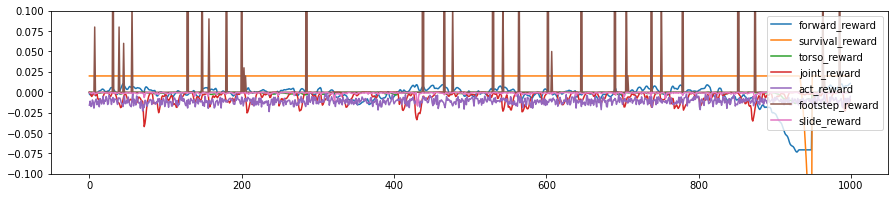

In [31]:
# forward_reward, upward_reward, joint_penalty, stability_reward, ACT2, footstep_reward, jerk, slide
analysis.plot_reward(weights=[4.0, 1.0, 1.0, 0.2, 0.0, 0.5, 1.0, 0.0, 0.5], ylim=[-0.1, 0.1]);

### Generate stick animation

In [14]:
analysis.get_stick_animation(max_frame=50, eCoM_coeff=0)

50/50
